# PCHN63101: ANOVA Workshop
In the accompanying lesson to this workshop we explored the topic of categorical predictor variables in regression models, exploring how the $t$-test and ANOVA are simply special cases of linear regression containing dummy variables. In this workshop, we will take this perspective further by showing how all the usual linear regression assumptions still remain and how we can use the same diagnostic plots and alternative approaches when using $t$-test or ANOVA models. We will also see how the information from the lesson can be easily generalised to form 3-way (and higher) ANOVA models. Finally, we will examine alternative methods of model comparison that do *not* rely on $F$-statistics and $p$-values, allowing the concept of an ANOVA as a model comparison procedure to be updated using modern statistical methods.

## Model Assumptions with Dummy Variables
Last week, we spent a lot of time discussing model assumptions and ways to address violations of assumptions. Although this was framed within multiple regression, we know that our aim here is to provide a *generic framework* for different types of analyses. In the accompanying lesson, we discovered that a $t$-test and ANOVA are effectively multiple regression in disguise. Part of the utility of this is that if these methods are just multiple regression, we can treat them in exactly the same way as any other regression model. This is particularly useful when it comes to the assumptions because these are *exactly the same*. This means we can use the same diagnostic plots with the same interpretation *and* can use the same methods of adjusting violations of assumptions.

### Assumptions in a $t$-test
To simplest way to illustrate this connection is to use a basic $t$-test model. We will have a look at an ANOVA a little further below. To start with, we will use the `vs` variable from `mtcars` as a factor with two levels. In the code below, we can how to use the `factor()` function to turn the original `vs` variable into a factor with labels for each level.

In [1]:
data(mtcars)
mtcars$vs <- factor(mtcars$vs, levels=c(0,1), labels=c('V-shaped','Straight'))

We can now fit the model and view the summary

In [2]:
vs.mod <- lm(mpg ~ vs, data=mtcars)
summary(vs.mod)


Call:
lm(formula = mpg ~ vs, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-6.757 -3.082 -1.267  2.828  9.383 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.617      1.080  15.390 8.85e-16 ***
vsStraight     7.940      1.632   4.864 3.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.581 on 30 degrees of freedom
Multiple R-squared:  0.4409,	Adjusted R-squared:  0.4223 
F-statistic: 23.66 on 1 and 30 DF,  p-value: 3.416e-05


So we can see that there is a significant effect of engine shape ($t_{30} = 4.86, p < 0.001$), which matches what we would get from a basic $t$-test

In [3]:
t.test(mpg ~ vs, data=mtcars, var.equal=TRUE)


	Two Sample t-test

data:  mpg by vs
t = -4.8644, df = 30, p-value = 3.416e-05
alternative hypothesis: true difference in means between group V-shaped and group Straight is not equal to 0
95 percent confidence interval:
 -11.274221  -4.606732
sample estimates:
mean in group V-shaped mean in group Straight 
              16.61667               24.55714 


However, part of the utility of the approach using `lm()` is that we can now assess all the assumptions of the $t$-test using our familiar diagnostic plots

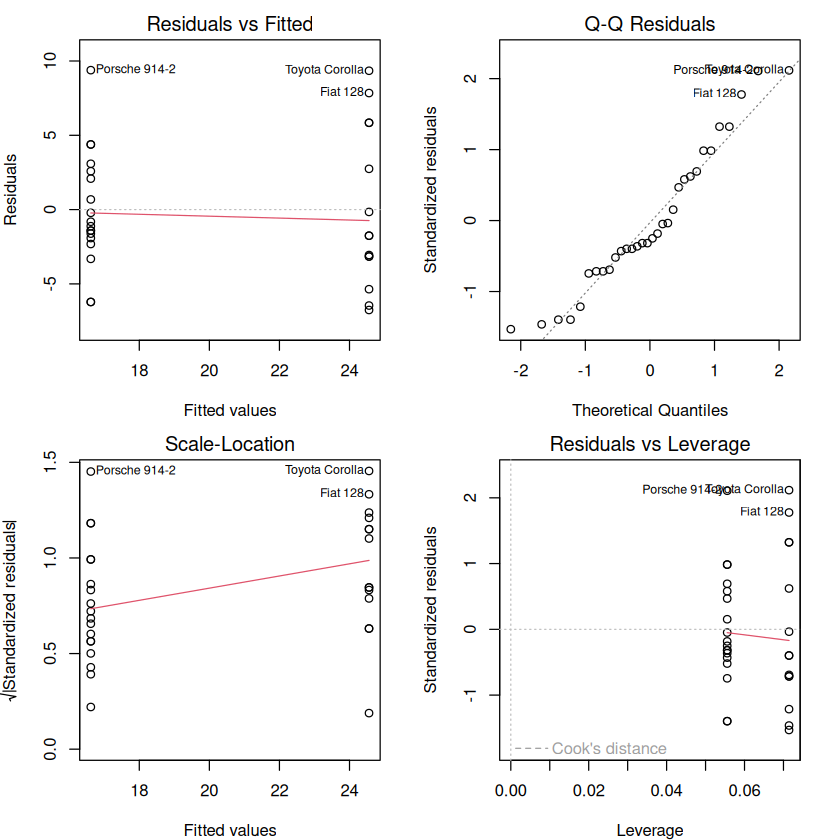

In [4]:
par(mfrow=c(2,2), mar=c(4,4,2,2))
plot(vs.mod)

<div class="alert alert-block alert-info"> 
<b>ACTIVITY 1</b> Before reading on, refer back to the interpretation of these plots from last week. Think about what they mean in the context of a $t$-test model and whether you think they are all still relevant?
</div>

In terms of interpreting these, we have the following guidance:

#### Residuals vs Fitted
The *Residuals vs Fitted* plot is less relevant with dummy variable models because the assumption of linearity is always met. All we are doing is drawing a line between the means of the two categories. The values in-between are not meaningful in the sense that a dummy value of 0.5 is not somehow half-way between the two groups. Because of this, there no sense in which having a curved line between the categories would make much sense. Indeed, this could not actually be fitted because a polynomial requires fewer unique points than degrees. If we had 3 categories, we could fit a *quadratic* curve through them, but this would require us to order the categories in some fashion, which is rarely meaningful.

#### Q-Q Residuals
Moving on to the *Q-Q Residuals* plot, this one *is* relevant for our simple $t$-test model. Remember, the normality assumption can also be thought of as the normality of the outcome variable *conditional* on the values of the predictor. When we have a dummy variable, the predictor only has *two* values, meaning that the assumption is that the data is normally distributed for each value of the dummy variable. In other words, normality is assumed *within each group*. In context, this means that the `Straight` engine group is normally distributed and the `V-shaped` engine group is normally distributed. This is a natural simplification of what we have seen before and means that this is one of the rarer cases where we could actually split the raw data into the two groups and then assess normality using the *outcome variable*. However, this is unnecessary when we can just stick to looking at the standardised residuals as usual.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY 2</b> Imagine you are working with a researcher who has not had the benefit of a very thorough statistical education. They decide to assess the normality assumption by producing a single histogram of the whole outcome variable. Why is this wrong and how would you try and explain this to them? 
</div>

#### Scale-Location
In terms of the *Scale-Location* plot, this is also of importance because the traditional $t$-test assumes homogeneity of variance. In other words, that the variance of the population distribution that each group is sampled from is identical. This can be assessed in the same fashion as any other regression model, where we look for an equal scattering of points around the horizontal line.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY 3</b> Can you remember from last week what method we could use to accommodate heterogeneity of variance in a regression model?
</div>

#### Residuals vs Leverage
Finally, for the *Residuals vs Leverage* plot, our main concern is *outliers*. Notice that all data points within the same category have the same amount of leverage. As such, there is little sense in trying to interpret leverage in these types of model. If a single category has high leverage, all that means is that a smaller group has an average that is quite different from the other categories. Outliers, however, will matter because they will potentially bias the group means.

### Assumption Violations in the $t$-test
Based on the plots above, there are not many concerns here. However, we know from last week that we have several options available to us if we are concerned. One of the key ones for $t$-test and ANOVA models is the use of GLS to accommodate heterogeneity of variance. Let us see this in action for the example above.

In [5]:
library(nlme)
vs.mod.gls <- gls(mpg ~ vs, data=mtcars, weights=varIdent(form= ~ 1|vs))
summary(vs.mod.gls)

Generalized least squares fit by REML
  Model: mpg ~ vs 
  Data: mtcars 
       AIC      BIC    logLik
  188.3395 193.9443 -90.16977

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | vs 
 Parameter estimates:
V-shaped Straight 
1.000000 1.393265 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) 16.616667 0.9099756 18.260563   0e+00
vsStraight   7.940476 1.7013899  4.667053   1e-04

 Correlation: 
           (Intr)
vsStraight -0.535

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.6102436 -0.5869410 -0.3079540  0.7015136  2.4304750 

Residual standard error: 3.860699 
Degrees of freedom: 32 total; 30 residual

In this example, we have used the `varIdent()` variance function, which tells GLS to fit a constant variance that depends upon the `form` argument. Here, we specify `~ 1|vs`, which means a constant variance for each level of `vs`. This means we get a different variance estimated for `V-shaped` and a different variance for `Straight`. 

In this instance, it has not made much difference to the results. However, it is interesting to compare it to the results of `t.test()` which has a `var.equal=` option. When set to `FALSE`, this implements a variant of the $t$-test known as Welch's $t$-test, which allows for different variances in each group. Note that both these solutions are *approximations*, as finding null distributions and $p$-values from population distributions with different variances is an unsolved issue in statistics known as the Behrens-Fisher problem. 

In [6]:
t.test(mpg ~ vs, data=mtcars, var.equal=FALSE)


	Welch Two Sample t-test

data:  mpg by vs
t = -4.6671, df = 22.716, p-value = 0.0001098
alternative hypothesis: true difference in means between group V-shaped and group Straight is not equal to 0
95 percent confidence interval:
 -11.462508  -4.418445
sample estimates:
mean in group V-shaped mean in group Straight 
              16.61667               24.55714 


We can see here that, apart from the degrees of freedom, these two results match. So, we can use GLS in this instance as a general-purpose tool for accommodating heterogeneity of variance that subsumes Welch's $t$-test.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY 4</b> Try using <code>lmperm</code> and <code>lmrob</code> with this example to accommodate non-normality and outliers.
</div>

### Assumptions and Violations in an ANOVA
The same approach shown above can be generalised for ANOVA models. To see this, let us return to the example of `origin` with 3 levels from the lesson. Including this factor alongside `vs` gives us a $2 \times 3$ ANOVA model. First we create the `origin` factor

In [7]:
mtcars$origin <- c('Japan','Japan','USA','USA','USA','USA','USA','Europe','Europe',
                   'Europe','Europe','Europe','Europe','Europe','USA','USA','USA',
                   'Europe','Japan','Japan','Japan','USA','USA','USA','USA',
                   'Europe','Europe','Europe','USA','Europe','Europe','Europe')

mtcars$origin <- as.factor(mtcars$origin)

Next, we have an additional complication we need to address. In our $2 \times 3$ design, we now have a cell that only contains *two* datapoints, both of which have *the same* value of MPG

In [8]:
mtcars$mpg[mtcars$origin == 'Japan' & mtcars$vs == 'V-shaped']

[1] 21 21

This is a problem because this cell contains *no variance*. As such, to make sure the examples below still work, we will alter the data to change one of these. This is purely for demonstration and obviously is not an exercise in condoning data tampering! So, with this in mind, we change the MPG of one of these cars from 21 to 18.

In [9]:

mtcars['Mazda RX4 Wag',]$mpg <- 18

Then, we can specify the model and examine the assumptions

Anova Table (Type II tests)

Response: mpg
          Sum Sq Df F value    Pr(>F)    
vs        305.69  1 17.5762 0.0002826 ***
origin    150.68  2  4.3318 0.0237849 *  
vs:origin   8.83  2  0.2540 0.7776033    
Residuals 452.20 26                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


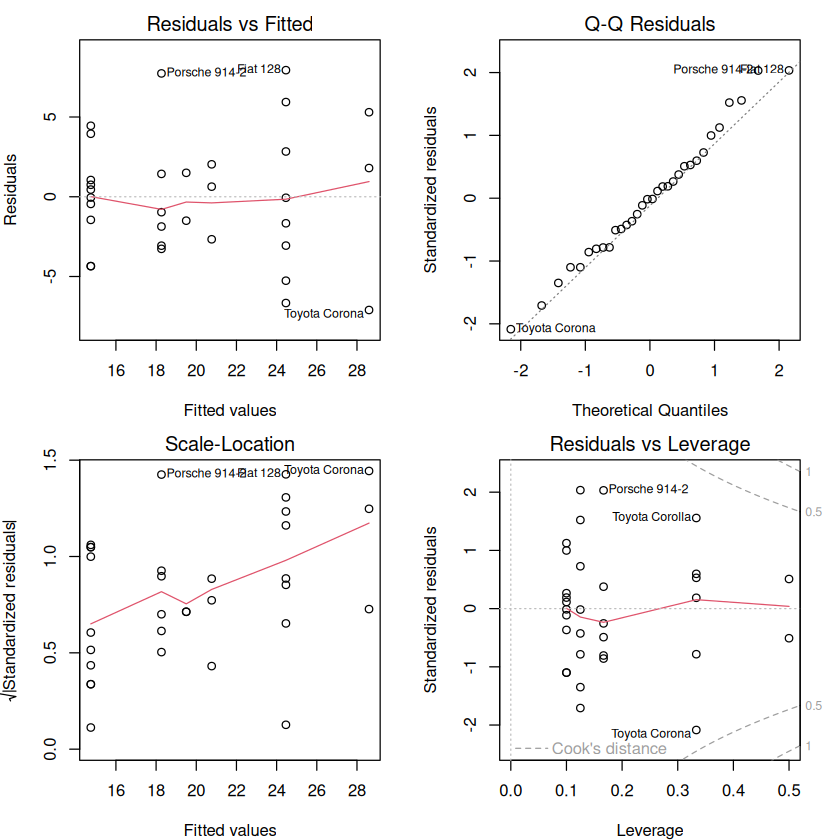

In [10]:
suppressMessages(library(car))

twoway.mod <- lm(mpg  ~ vs*origin, data=mtcars)
print(Anova(twoway.mod))

par(mfrow=c(2,2), mar=c(4,4,2,2))
plot(twoway.mod)

Based on these plots, normality seems OK and there are no obvious outliers (using $|t_{i}| > 3$). However, the variance looks like it differs across the different cells of the design.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY 5</b> Why is it that the cells of the design are visible as vertical stacks of points in a visualisation such as the Residuals vs Fitted plot? <b>HINT</b> Think about the <i>x</i>-axis in this plot and what it means for data to share the same value on this axis.  
</div>

In order to accommodate different variances for each factor, we can use the `varIdent()` function, but specify the grouping factor as the *interaction* between `vs` and `origin`. This will result in a separate variance term for each cell of the design.

In [11]:
twoway.mod.gls <- gls(mpg ~ vs*origin, data=mtcars, weights=varIdent(form= ~ 1|vs*origin))
summary(twoway.mod.gls)

Generalized least squares fit by REML
  Model: mpg ~ vs * origin 
  Data: mtcars 
      AIC      BIC   logLik
  176.039 191.1362 -76.0195

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | vs * origin 
 Parameter estimates:
 V-shaped*Japan    Straight*USA    V-shaped*USA Straight*Europe V-shaped*Europe 
       1.000000        1.137574        1.382652        2.459440        1.959062 
 Straight*Japan 
       3.013673 

Coefficients:
                           Value Std.Error   t-value p-value
(Intercept)            18.266667  1.696598 10.766643  0.0000
vsStraight              6.195833  2.506177  2.472225  0.0203
originJapan             1.233333  2.264607  0.544612  0.5907
originUSA              -3.516667  1.933578 -1.818736  0.0805
vsStraight:originJapan  2.904167  4.706832  0.617011  0.5426
vsStraight:originUSA   -0.179167  3.013687 -0.059451  0.9530

 Correlation: 
                       (Intr) vsStrg orgnJp orgUSA vsSt:J
vsStraight             -0.

We can compare the Scale-Location plot between the two methods to see the effect

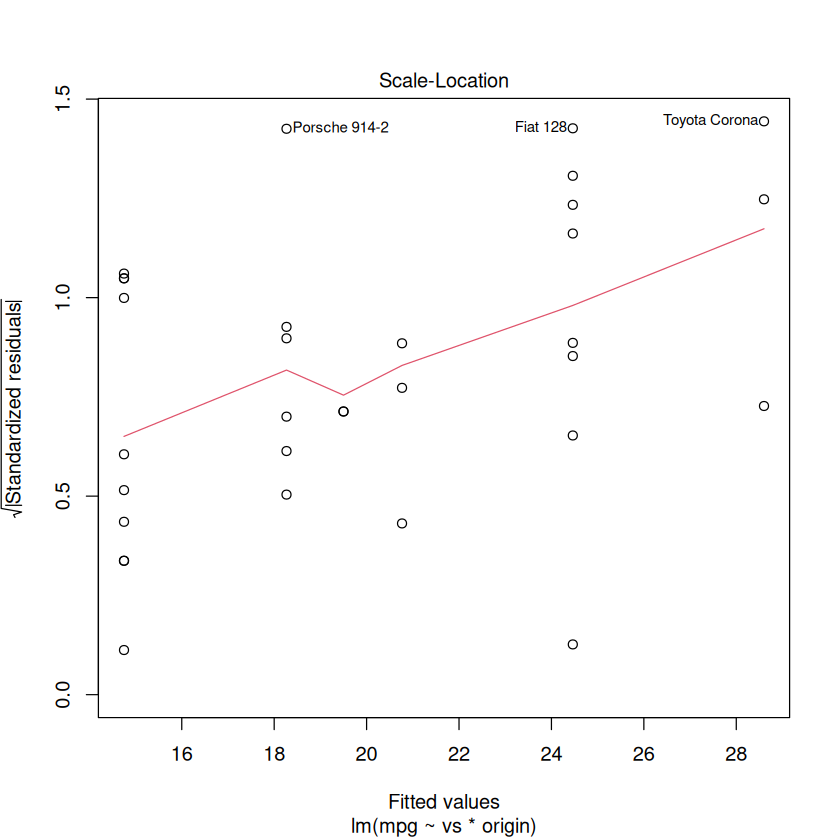

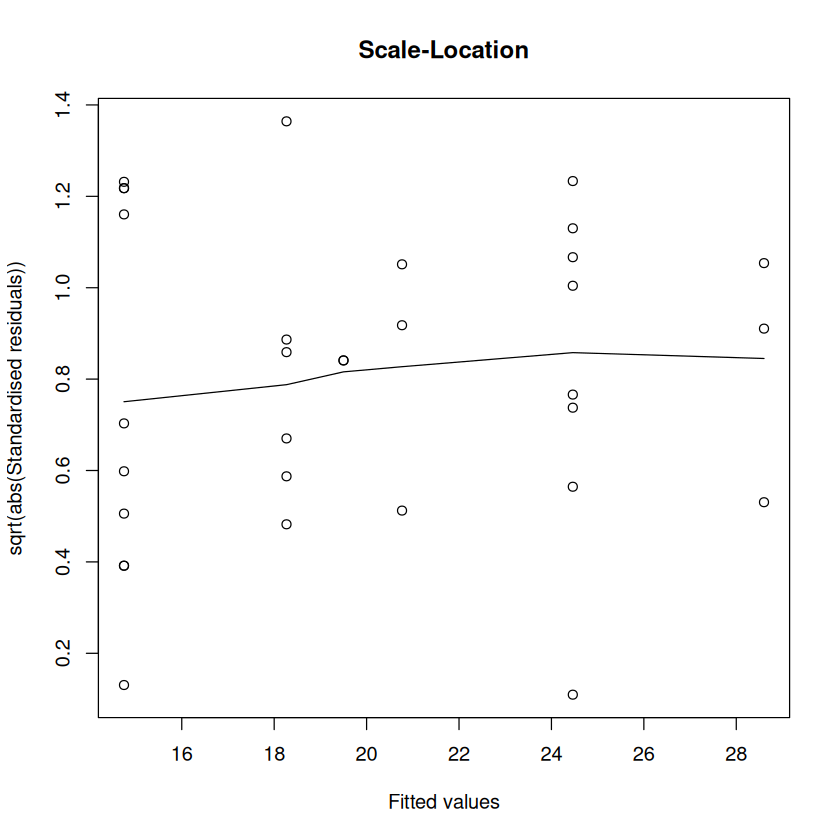

In [12]:
# Scale-Location from lm()
plot(twoway.mod, which=3)

# Scale-Location from gls()
fit.val <- fitted(twoway.mod.gls)
res.std <- residuals(twoway.mod.gls, type="pearson")

plot(fit.val, 
     sqrt(abs(res.std)), 
     xlab="Fitted values", 
     ylab="sqrt(abs(Standardised residuals))",
     main="Scale-Location")

lines(lowess(fit.val, sqrt(abs(res.std))))

So, the GLS model is much flatter, suggesting an equalisation of the variance across the cells of the design. We can now consider the ANOVA omnibus effects

In [13]:
print(Anova(twoway.mod.gls))

Analysis of Deviance Table (Type II tests)

Response: mpg
          Df   Chisq Pr(>Chisq)    
vs         1 23.7327  1.107e-06 ***
origin     2 13.5134   0.001163 ** 
vs:origin  2  0.5184   0.771688    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Notice that `Anova()` from `car` provides asymptotic $\chi^{2}$ tests by default, instead of $F$-tests. This is because the notion of degrees of freedom in the GLS model is quite controversial. In simple terms, the degrees of freedom of a GLS model will be different from OLS because of the additional variance parameters. Although you might think we can just include these in the calculation of the degrees of freedom, variance and correlation parameters do not influence the model in the same way. It is no longer "1 parameter = 1 lost degree of freedom". In fact, the extra complication of adding these makes the degrees of freedom *impossible* to calculate. The whole concept of degrees of freedom breaks-down here. For GLS with an *estimated* covariance structure, degrees of freedom simply do not exist. The best we can do is calculate *effective* degrees of freedom which are, to put it bluntly, a *guess* that only exist to make NHST work.

Based on this, we have two options for inference. The first is a blind guess for the degrees of freedom. This is what `gls()` does in terms of reporting the $t$-statistics and $p$-values. The second option is to ignore the whole concept and base inference on test-statistics that do not need the residual degrees of freedom. We know these will not necessarily be accurate in small samples, but *asymptotically* they will be correct. This is what the `Anova()` function will do. 

If we *really* care about this and *really* want $F$-statistics, we can use the effective degrees of freedom from the `gls()` summary with `Anova()`. We can see at the bottom of the summary table above it says: `Degrees of freedom: 32 total; 26 residual`. Remember, this is a wild guess that has not taken the variance parameters into account. Nevertheless, we can plug this into `Anova()`

In [14]:
print(Anova(twoway.mod.gls, test.statistic="F", error.df=26))

Analysis of Deviance Table (Type II tests)

Response: mpg
          Df       F    Pr(>F)    
vs         1 23.7327 4.716e-05 ***
origin     2  6.7567  0.004335 ** 
vs:origin  2  0.2592  0.773658    
Residuals 26                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


and now we have more traditional ANOVA tests. However, do not discount the fact that these are *very approximate*.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY 6</b> At this point in time, which approach do you feel more comfortable using? The method with approximate degrees of freedom, or the method with asymptotic tests?  
</div>

## 3-way ANOVA and Beyond
In terms of factorial ANOVA models, we have mainly focussed on 2-way models. However, we can have as many factors and interactions as we like, so long as each cell contains *at least* 2 measurements that are different (so that there is some variance left after fitting the cell means). Although the temptation in psychology is often to create very complex factorial experiments, a caution is needed. Firstly, the higher the interaction goes, the more *power* is needed to detect the effect (in the Neyman-Pearson sense). This means you need more data per-cell, which can make the required sample size wildly impractical. Secondly, understanding and breaking-down the effects (which we will discuss more next week) can become a real interpretational headache. As such, we would caution against anything beyond a 3-way ANOVA.

### Example 3-way Dataset
We will move away from the `mtcars` dataset and introduce a useful `R` package that contains many example datasets organised by the type of analysis you can perform. This package is called `datarium`, and is well worth exploring if you want to try more examples of different analyses. In this package is a dataset called `'heartattack'` that contains measures of cholesterol concentration in 72 participants treated with three different drugs. The aim is to examine the potential of a new class of drugs in lowering the cholesterol concentration and consequently reducing heart attack. 

We first load and examine the data below

In [15]:
library('datarium')
data('heartattack')
print(head(heartattack))

# A data frame: 6 × 5
  gender risk  drug  cholesterol    id
* <fct>  <fct> <fct>       <dbl> <int>
1 male   low   A            5.24     1
2 male   low   A            5.08     2
3 male   low   A            4.68     3
4 male   low   A            5.36     4
5 male   low   A            4.96     5
6 male   low   A            4.83     6


As we can see, the data is already organised and ready-to-go as a 3-way ANOVA model. This is the nice thing about the data from `datarium` (though it does not provide a very realistic picture of real-world data).

### 3-way ANOVA Model
We can fit a 3-way ANOVA model using `lm()`. We have two options here. The first is to specify the full-factorial model manually using

In [16]:
mod.3way <- lm(cholesterol ~ gender + risk + drug +                   # main effects
                             gender:risk + gender:drug + risk:drug +  # 2-way interactions
                             gender:risk:drug,                        # 3-way interaction
               data=heartattack)

However, we can see how tedious and error-prone this might be. So it is generally better to let `R` do the work for us and specify the model using

In [17]:
mod.3way <- lm(cholesterol ~ gender*risk*drug, data=heartattack)
summary(mod.3way)


Call:
lm(formula = cholesterol ~ gender * risk * drug, data = heartattack)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69387 -0.20807  0.01759  0.16801  0.58370 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  6.1256     0.1186  51.644  < 2e-16 ***
genderfemale                -0.9164     0.1677  -5.463 9.48e-07 ***
risklow                     -1.1022     0.1677  -6.571 1.34e-08 ***
drugB                       -0.6868     0.1677  -4.094 0.000129 ***
drugC                       -0.8625     0.1677  -5.142 3.14e-06 ***
genderfemale:risklow         0.7912     0.2372   3.335 0.001466 ** 
genderfemale:drugB           0.8394     0.2372   3.538 0.000785 ***
genderfemale:drugC           1.0059     0.2372   4.240 7.84e-05 ***
risklow:drugB                0.4944     0.2372   2.084 0.041436 *  
risklow:drugC                0.7571     0.2372   3.191 0.002253 ** 
genderfemale:risklow:drugB  -1.0297     0.3355  -3.069 0.

As we can see, there are a lot of parameters here and we would not even bother trying to work out what they all mean (unless you are very bored on a Sunday afternoon). Instead, we can create our omnibus tests, as usual

In [1]:
print(Anova(mod.3way))

ERROR: Error in Anova(mod.3way): could not find function "Anova"


So, from this, we can see that the 3-way interaction is significant. In terms of following this up (which we will cover in the asynchronous materials this week), we would therefore look at the 3-way interaction *only* and ignore everything else. If the 3-way interaction was *not* significant, we would interpret the 2-way interactions *only* and ignore everything else. If all the 2-way interactions were *not* significant, we would interpret the main effects. This interpretational hierarchy respects something called the *principle of marginality*, which we will discuss in the materials this week. 

<div class="alert alert-block alert-info"> 
<b>ACTIVITY 7</b> Can you use <code>gls()</code> to build a 3-way ANOVA model for the <code>heartattack</code> data that allows for different variances in each cell of the design?
</div>

### Plotting a 3-way ANOVA
Although we will not take the numeric interpretation any further for now, we can at least have a look at some plots to understand what the 3-way interaction means. Using the `effects` package, we can generate some useful plots to understand this effect.

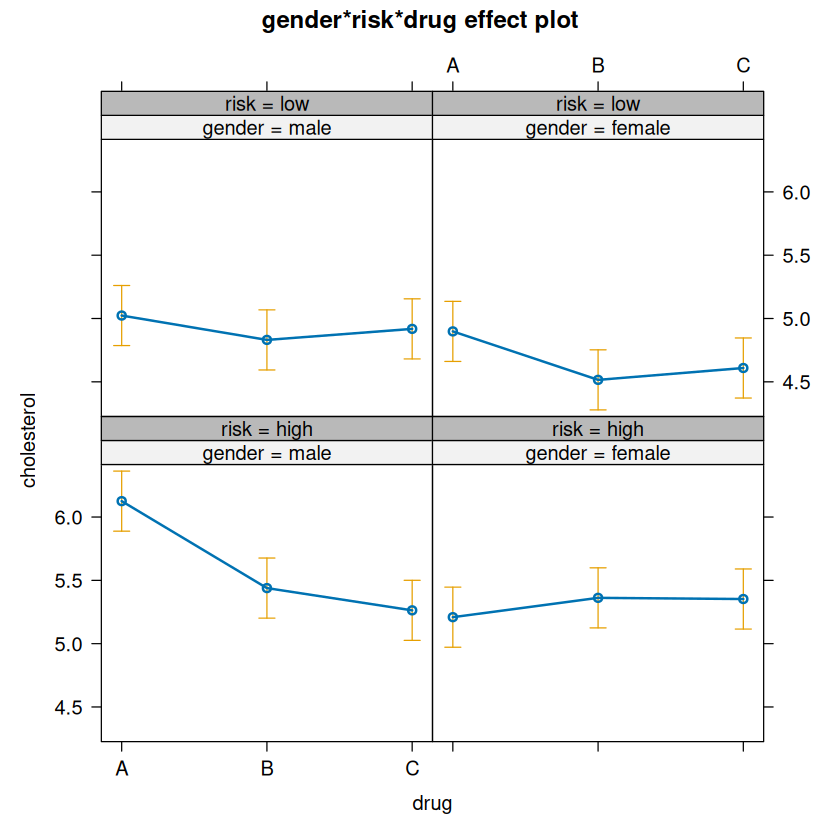

In [19]:
suppressMessages(library(effects))
plot(effect('gender:risk:drug', mod=mod.3way))

The easiest way to understand a 3-way interaction is by interpreting it as a test of whether a 2-way interaction differs depending upon the levels of a third factor. In the plot above, we can think of this as testing whether the Drug x Gender effect is different depending upon the level of Risk. The *top* row shows Drug x Gender when the level of Risk is *low*, and the *bottom* row shows Drug x Gender when the level of Risk is *high*. As we can see, it appears as if the effect is being driven by the difference in high-risk males on drug A compared to high-risk females on drug A.

There are a few different options to control the ordering of the factors in terms of these plots. The first is to explicitly dictate which factor is drawn along the $x$-axis using the `x.var` argument.

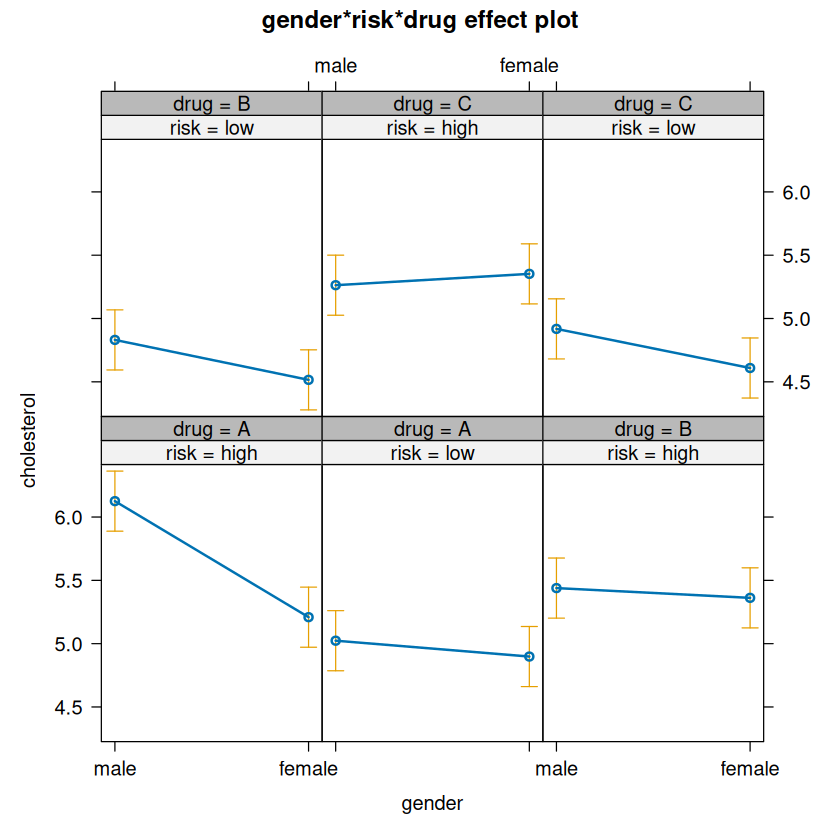

In [20]:
plot(effect('gender:risk:drug', mod=mod.3way), x.var='gender')

However, we can see that the resultant plot makes a bit of a mess of the factor structure. A better method is to draw the third factor as multiple lines within each panel. We can dictate which factor we want using the `lines=` option. Note that we have to explicitly add the confidence intervals back in, if we want them.

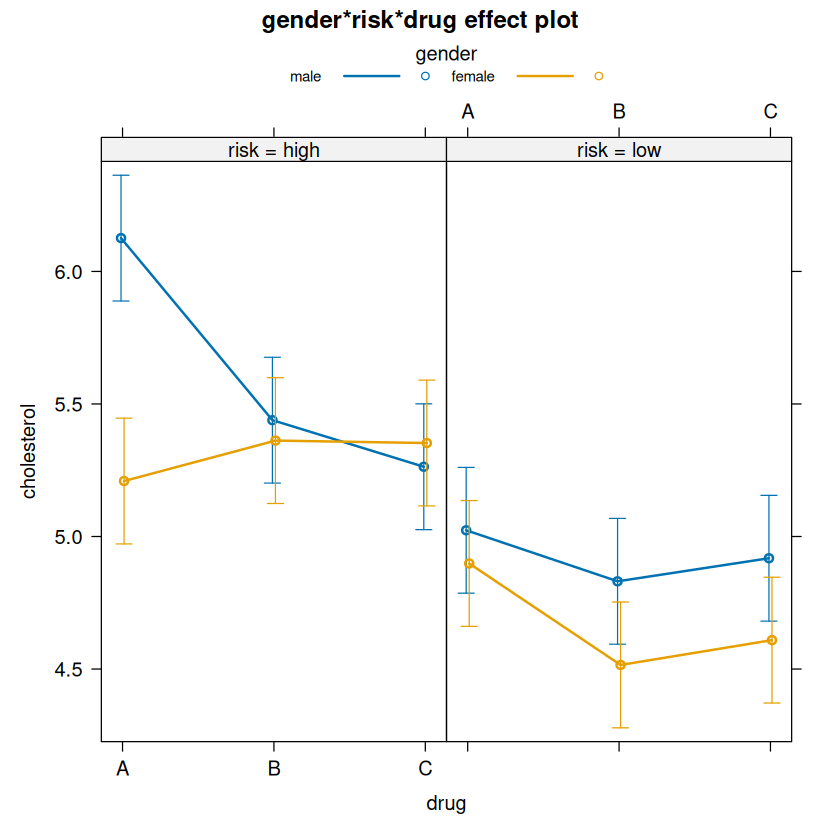

In [21]:
plot(effect('gender:risk:drug', mod=mod.3way),   # the 3-way effect
     x.var='drug',                               # put drug on the x-axis
     lines=list(z.var='gender', multiline=TRUE), # set gender as different lines within each panel 
     confint=list(style='bars'))                 # add the 95% CIs back in

Now we can much more clearly see that the interaction is being driven by the difference between `male` and `female` within the `high` risk category when taking drug `A`.

<div class="alert alert-block alert-info"> 
<b>ACTIVITY 8</b> Can you redraw the effects plot above with <code>gender</code> on the <i>x</i>-axis and <code>drug</code> as different lines? What other orderings can you come up with? Which one is more intuitive to you in terms of interpreting the interaction?
</div>

## Other Model Comparison Methods
Within the lesson, our focus was very much on the ANOVA as a *model comparison* procedure. However, as we saw, the $F$-statistic and subsequent tests are not always the easiest or most straight-forward methods for comparing models. Indeed, more modern statistics would use different metrics for this purpose and would not rely on the ANOVA tests or $p$-values when building the most suitable model.

### $R^{2}$, AIC and BIC
Although many model comparison metrics exist, the most common ones that get used are $R^{2}$, the Akaike ("Ah-kah-ee-keh") Information Criterion (AIC) and the Bayesian Information Criterion (BIC). Although there is much more to be learned about these, the brief summary below should suffice for now

- $R^2$ = how much variance the model explains
    - Measures the proportion of variance in the outcome explained by the predictors.
    - Ranges from 0 to 1.
    - Higher is “better,” but only in a descriptive sense.
    - Always increases when you add more parameters (adjusted-$R^2$ corrects for this).
    - Not always well-defined beyond OLS models.
- AIC = how well the model predicts new data
    - Lower AIC means *better* expected predictions.
    - Balances fit and complexity by: 
        - *Rewarding* models that fit well. 
        - *Penalising* models that add too many parameters.
- BIC = approximate model evidence from a Bayesian perspective
    - Balances fit and complexity, like the AIC.
    - Much stronger penalty for extra parameters than AIC.
    - Lower BIC means “better supported” model, given the data.

In terms of interpretation, for both $R^{2}$ and adjusted-$R^{2}$ we need to have a sense of how much change in explanatory variance we would consider meaningful. For both AIC and BIC, there are heuristics we can use to assess the degree of change. For AIC, the canonical reference is [Burnham & Anderson (2002)](https://link.springer.com/book/10.1007/b97636), and for BIC it is [Raftery (1995)](https://www.jstor.org/stable/271063). The criteria are given below

| **Change**  | **AIC Interpretation**                                         | **BIC Interpretation**                                     |
| ------------- | -------------------------------------------------------------  | -----------------------------------------------------------|
| **0–2**       | Higher-AIC model has **no meaningful predictive disadvantage** | **Weak evidence** against the higher-BIC model             |
| **2–4**       | Higher-AIC model shows a **small drop** in predictive ability  | **Weak-to-Positive evidence** against the higher-BIC model |
| **4–6**       | Higher-AIC model shows a **clear predictive disadvantage**     | **Positive evidence** favouring the lower-BIC model        |
| **6–10**      | Higher-AIC model is **substantially poorer** in prediction     | **Strong evidence** favouring the lower-BIC model           |
| **>10**       | Higher-AIC model is **dramatically poorer** in prediction      | **Very strong evidence** favouring the lower-BIC model      |

Because BIC has a stronger penalty for larger models, the interpretation is graded slightly differently for BIC compared to AIC, though they are very similar. In addition, the metrics focus on different elements. The AIC is very much about *predictive performance* of the better model (smaller AIC) compared to the worse model (larger AIC). The BIC is focussed on the evidence for each model from the data, balanced with parsimony (i.e. preferring simpler models). In general, changes around 4 start to favour the model with a *lower* AIC/BIC, though this is weaker evidence when using BIC compared to AIC.

### Comparing models in `R`
We can calculate $R^2$, adjusted-$R^2$, AIC and BIC through base `R`, though we have to collate all this information together if we want to compare it. The `performance` package does this for us and so is a handy utility to have. As an example, we can again use the `heartattack` data and compare the models with and without the 3-way interaction. In the example below, we make use of the `^` formula syntax to indicate the highest-order interaction we want in each model (which is why we cannot use this to raise a variable to a power).

In [ ]:
library('performance')

mod.null <- lm(cholesterol ~ (gender + risk + drug)^2, data=heartattack)
mod.full <- lm(cholesterol ~ (gender + risk + drug)^3, data=heartattack) # gender*risk*drug

print(compare_performance(mod.null, mod.full, metrics = c('R2','R2_adj','AIC','BIC')))

# Comparison of Model Performance Indices

Name     | Model | AIC (weights) | BIC (weights) |    R2 | R2 (adj.)
--------------------------------------------------------------------
mod.null |    lm |  51.1 (0.003) |  76.1 (0.025) | 0.638 |     0.585
mod.full |    lm |  39.2 (0.997) |  68.8 (0.975) | 0.710 |     0.656


Working through the metrics, we can see that the model *with* the 3-way interaction explains 65.6% of the variance in `cholesterol`, whereas the model *without* only explains 58.5%. On its own, this would seem a meaningful change, but we can see what AIC and BIC say. The change in AIC is

In [23]:
print(51.1 - 39.2)

[1] 11.9


which sits happily in the "dramatically poorer prediction" range, in terms of the larger-AIC model. In this example, the model *without* the 3-way interaction is the much worse performer. Similarly, the change in BIC is

In [24]:
print(76.1 - 68.8) 

[1] 7.3


which confers "strong evidence" against the non-3-way interaction model. The BIC is more conservative here because the 3-way interaction model needs more parameters and thus is the less parsimonious choice.

On balance, all these metric seems to agree that the 3-way interaction is necessary for a better model prediction, has good evidential support from the data and substantially increases the amount of variance explained. Notice that this was all concluded *without* a $p$-value or the use of the word "significant".

<div class="alert alert-block alert-info"> 
<b>ACTIVITY 9</b> Can you create the model comparison metrics for this 3-way interaction using a <code>gls()</code> model? <b>NOTE</b> For similar reasons to degrees of freedom, both <code>'R2'</code> and <code>'R2_adj'</code> are ill-defined for GLS models, so just use AIC and BIC instead.
</div>

<div class="alert alert-block alert-warning"> 
<b>TEST QUESTIONS</b> 

Use the questions below to check your understanding of all the materials from this week.

1. What is a dummy variable?
2. What are the interpretations of the parameters in a <i>simple regression</i> model that contains a single dummy variable?
3. What element of the regression output is equivalent to a <i>t</i>-test, when including a single dummy variable?
4. How are factors with more than 2 levels accommodated into a regression model with dummy variables?
5. How would the parameters be interpreted in a regression model containing a single factor with 3 levels?
6. What is an omnibus test and what is its justification?
7. How is the <i>F</i>-statistic used within the context of an omnibus test and how does this relate to model comparisons?
8. What are the two functions we can use to generate ANOVA tables in <code>R</code>?
9. What is the core assumption made by an additive ANOVA model and how does this affect the parameter estimates?
10. What is an interaction and how does it relate to a full-factorial ANOVA model versus an additive ANOVA model?
</div>